In [1]:
import pandas as pd
import numpy as np
import seaborn as sb 
import matplotlib.pyplot as plt

In [53]:
train= pd.read_csv('train.csv')

In [54]:
test= pd.read_csv('test1.csv')

In [55]:
train.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
0,IT_1,2007-07-05,0,0,0,0,0.5,2785,4240
1,IT_2,2007-07-05,0,1,0,0,0.7,3574,4756
2,IT_3,2007-07-05,0,103,0,1,1.6,5978,9669
3,IT_4,2007-07-05,0,103,0,0,0.0,5681,8313
4,IT_5,2007-07-05,0,103,0,2,0.0,4924,7257


In [56]:
test.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,High_Cap_Price
0,IT_265079,2014-01-19,0,3,0,0,0.1,5303
1,IT_265087,2014-01-19,0,268,0,2,1.4,10492
2,IT_265107,2014-01-19,0,320,0,0,13.4,24706
3,IT_265139,2014-01-19,17,358,0,3,5.5,23464
4,IT_265142,2014-01-19,18,23,5,2,0.0,6222


In [57]:
test.isnull().sum()

Item_Id             0
Date                0
State_of_Country    0
Market_Category     0
Product_Category    0
Grade               0
Demand              0
High_Cap_Price      0
dtype: int64

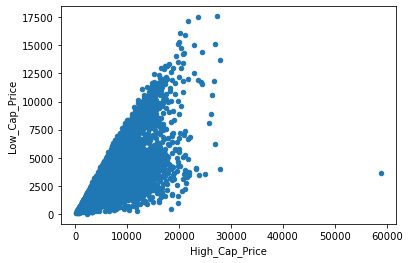

In [58]:
train.plot(x='High_Cap_Price', y='Low_Cap_Price', kind='scatter')

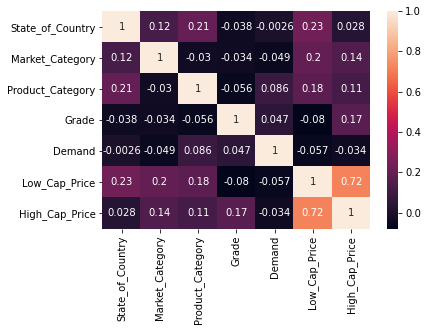

In [59]:
sb.heatmap(train.corr(),annot=True)

Almost all attributes have approximately positive correlation with Low Cap Price

In [60]:
train.drop(columns=['Item_Id', 'Date'], inplace=True)
test.drop(columns=['Item_Id', 'Date'], inplace=True)

In [61]:
train_x=train.loc[:,train.columns!=('Low_Cap_Price')]

In [62]:
train_y=train['Low_Cap_Price']

In [63]:
print(train_y)

0       2785
1       3574
2       5978
3       5681
4       4924
        ... 
9793     124
9794     225
9795    4721
9796    5082
9797    3899
Name: Low_Cap_Price, Length: 9798, dtype: int64


In [64]:
from sklearn.ensemble import AdaBoostRegressor

In [65]:
ada = AdaBoostRegressor()

In [66]:
ada.fit(train_x, train_y)

AdaBoostRegressor()

In [67]:
y_pred=ada.predict(test)

In [68]:
test['Low_Cap_Price']=y_pred

In [69]:
test.head()

,State_of_Country,Market_Category,Product_Category,Grade,Demand,High_Cap_Price,Low_Cap_Price
0,0,3,0,0,0.1,5303,2908.753992
1,0,268,0,2,1.4,10492,4748.248889
2,0,320,0,0,13.4,24706,6577.972067
3,17,358,0,3,5.5,23464,11722.659905
4,18,23,5,2,0.0,6222,3040.120279
